In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(font_scale=1.5)

**************************************************

Presenteeism param sweep -- large-goods wp

**************************************************

In [2]:
df = pd.read_csv("presenteeism_param_sweep_pairs.csv")
df['NRecovered'] = df['FracRecovered']*df['NStaff']

In [3]:
II = np.unique(df["InfInit"])
PIsol = np.unique(df['Pisol'])
PFC = np.unique(df['p_friend_contact'])

print('Driver contact rate = ', np.unique(df["tD"]))
print('Fixed pairs = ', np.unique(df["fixed_driver_pairs"]))
print('Window open = ', np.unique(df["is_window_open"]))
print('Pair isolation = ', np.unique(df["pair_isolation"]))
print('Phi = ', np.unique(df['phi']))
print('Random contact rate = ', np.unique(df['p_contact']))
print('Staff totals = ', np.unique(df['NStaff']))
job = ['Driver','Picker','Office']

Driver contact rate =  [0.5]
Fixed pairs =  [ True]
Window open =  [False]
Pair isolation =  [ True]
Phi =  [0.05]
Random contact rate =  [0.04545455]
Staff totals =  [ 8 16 20 44]


In [4]:
dfall = df[df["Group"]=='All']
dfall['outbreak'] = (dfall['NRecovered'] > 3)
dfall['Ninfected'] = (dfall.loc[:,'FracRecovered']*dfall.loc[:,'NStaff'] - 1)
dfall['InfJob'] = np.ones(len(dfall),dtype=np.object)
for i in np.arange(3):
    dfall.loc[dfall['InfInit']==i+1,'InfJob'] = job[i]

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

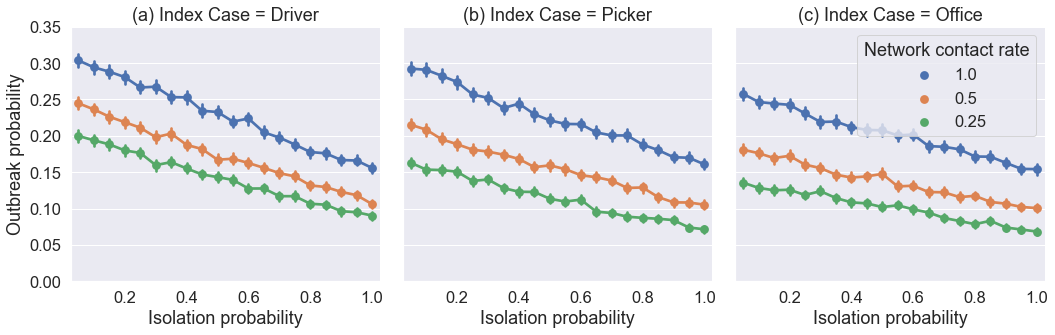

In [8]:
sns.set_color_codes()
sp = sns.catplot(x="Pisol", y="outbreak", col="InfInit", hue="p_friend_contact",\
                   hue_order=[PFC[2],PFC[1],PFC[0]],data=dfall, kind="point",legend=False)
sp.set(ylim=(0,0.35),xlabel='Isolation probability')
axes = sp.axes.flatten()
axes[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
xticklabs = np.array(PIsol,dtype=np.object)

xticklabs[(np.arange(len(PIsol)) - 3)%4 != 0] = None

sp.set_xticklabels(xticklabs)
plt.legend(loc='upper right',title='Network contact rate')
plt.tight_layout()
sp.savefig('Outbreak_prob_presenteeism_pairs.png')

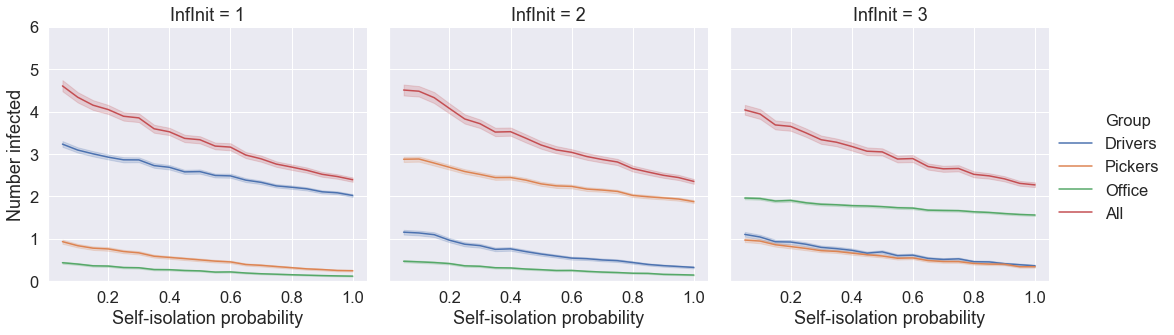

In [6]:
figh = sns.relplot(x="Pisol", y="NRecovered", col="InfInit",hue="Group",\
                   data=df.loc[lambda df: (df['p_friend_contact'] == 1.0)], kind="line")
figh.set(xlabel='Self-isolation probability',ylabel='Number infected', ylim=(0,6))
figh.savefig("network_workplace_presenteeism_outbreak_size_pairs.png")

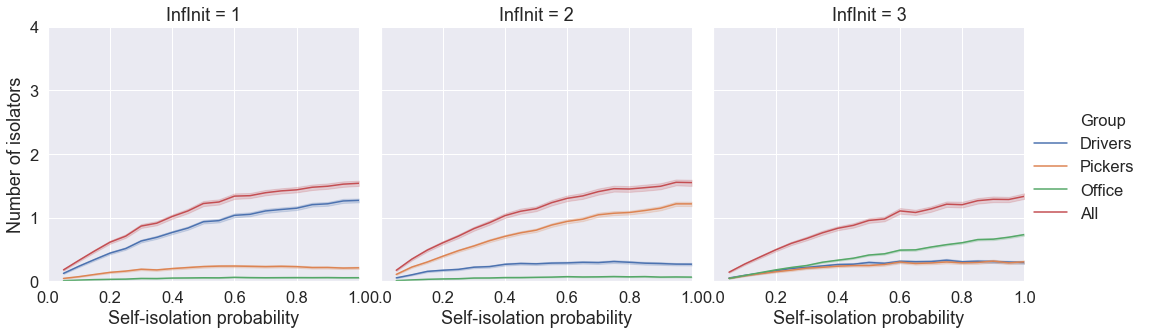

In [7]:
df['IsolatorsNum'] = df['IsolatorsFrac']*df['NStaff']
figh = sns.relplot(x="Pisol", y="IsolatorsNum", col="InfInit",hue="Group",\
                   data=df.loc[lambda df: (df['p_friend_contact'] == 1.0)], kind="line")
figh.set(xlabel='Self-isolation probability',ylabel='Number of isolators', xlim=(0,1), ylim=(0,4))
figh.savefig("tot_isolators_presenteeism_pairs.png")